In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 



In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

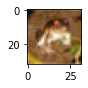

In [11]:
plot_sample(0)

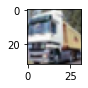

In [12]:
plot_sample(1)

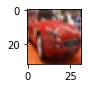

In [13]:
plot_sample(5)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

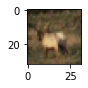

In [15]:
plot_sample(3)

In [16]:
y_train[3]

array([4], dtype=uint8)

In [17]:
classes[y_train[3][0]]

'deer'

In [35]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [36]:
y_test.shape

(10000, 1)

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
y_train[2]

array([9], dtype=uint8)

In [19]:
classes[y_train[2][0]]

'truck'

In [38]:
X_train_scaled = X_train[0]/255
X_test_scaled = X_test/255

In [21]:
X_train_scaled.shape

(32, 32, 3)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [47]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10 , dtype = 'float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype= 'float32'
)
#

In [40]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [48]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10 , dtype = 'float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
32*32*3

3072

In [43]:
y_train_categorical.shape

(50000, 10)

In [44]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
X_train.size

153600000

In [31]:
y_train.size

50000

In [56]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000,activation = 'relu'),
        keras.layers.Dense(1000,activation = 'relu'),
        keras.layers.Dense(10,activation = 'sigmoid')

    ])
model.compile(optimizer = 'SGD', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

ValueError: ignored

In [57]:
model.predict(X_test_scaled)[0]

array([0.55228436, 0.5885538 , 0.40022987, 0.38360572, 0.46092144,
       0.4912016 , 0.5285095 , 0.5193149 , 0.59074754, 0.5384985 ],
      dtype=float32)

In [61]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [62]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 8s 25ms/step - loss: 2.3457 - accuracy: 0.1174


[2.3457090854644775, 0.11739999800920486]

In [60]:
classes[y_test[1][0]]

'ship'

In [33]:
y_test[0]

array([3], dtype=uint8)

In [52]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [64]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

ValueError: ignored